# Pierwszy rzut okiem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## plotImage (function)

In [2]:
def plotImage(image):
    plt.imshow(X=image, cmap="binary")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def plotImageWithGrid(image):
    plt.imshow(X=image, cmap="binary")
    plt.tight_layout()
    plt.grid("on")
    plt.show()

In [3]:
image = Image.open("Skany profili/Profil 001.1.jpg")
#image = image.convert("1")

In [4]:
data = np.asarray(image)

In [5]:
data = 1 - (0.2989 *data[:,:,0] + 0.5870 * data[:,:,1] + 0.1140 * data[:,:,2])

In [6]:
data.shape

(1754, 1275)

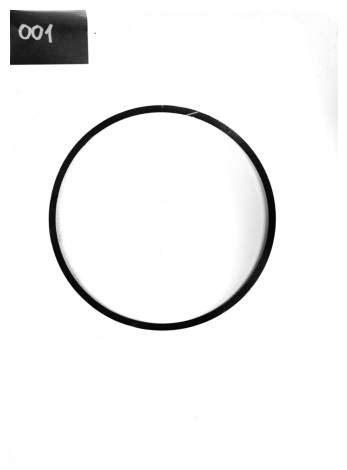

In [7]:
plotImage(data)

In [8]:
data = 1 - data

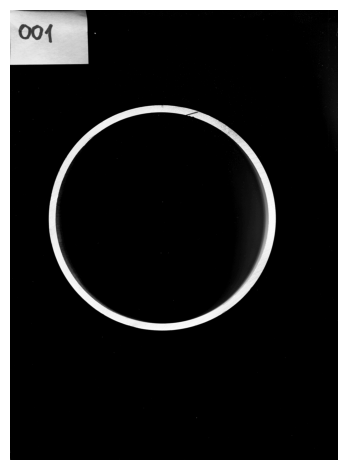

In [9]:
plotImage(data)

## read_and_convert_to_binary (function)(1st version)

In [10]:
def read_and_convert_to_binary(filepath, threshold = 0.3):
    """
    Requires numpy and Image from PIL
    """
    image = Image.open(filepath)

    data = np.asarray(image)
    data = 0.2989 * data[:,:,0] + 0.5870 * data[:,:,1] + 0.1140 * data[:,:,2]
    data = data / 255
    data = 1 - data
    data = data > threshold

    return data    

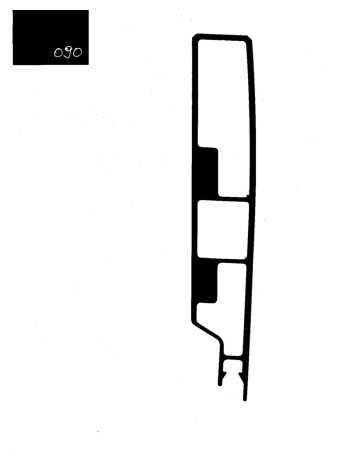

In [11]:
plotImage(read_and_convert_to_binary("Skany profili/Profil 090.1.jpg"))

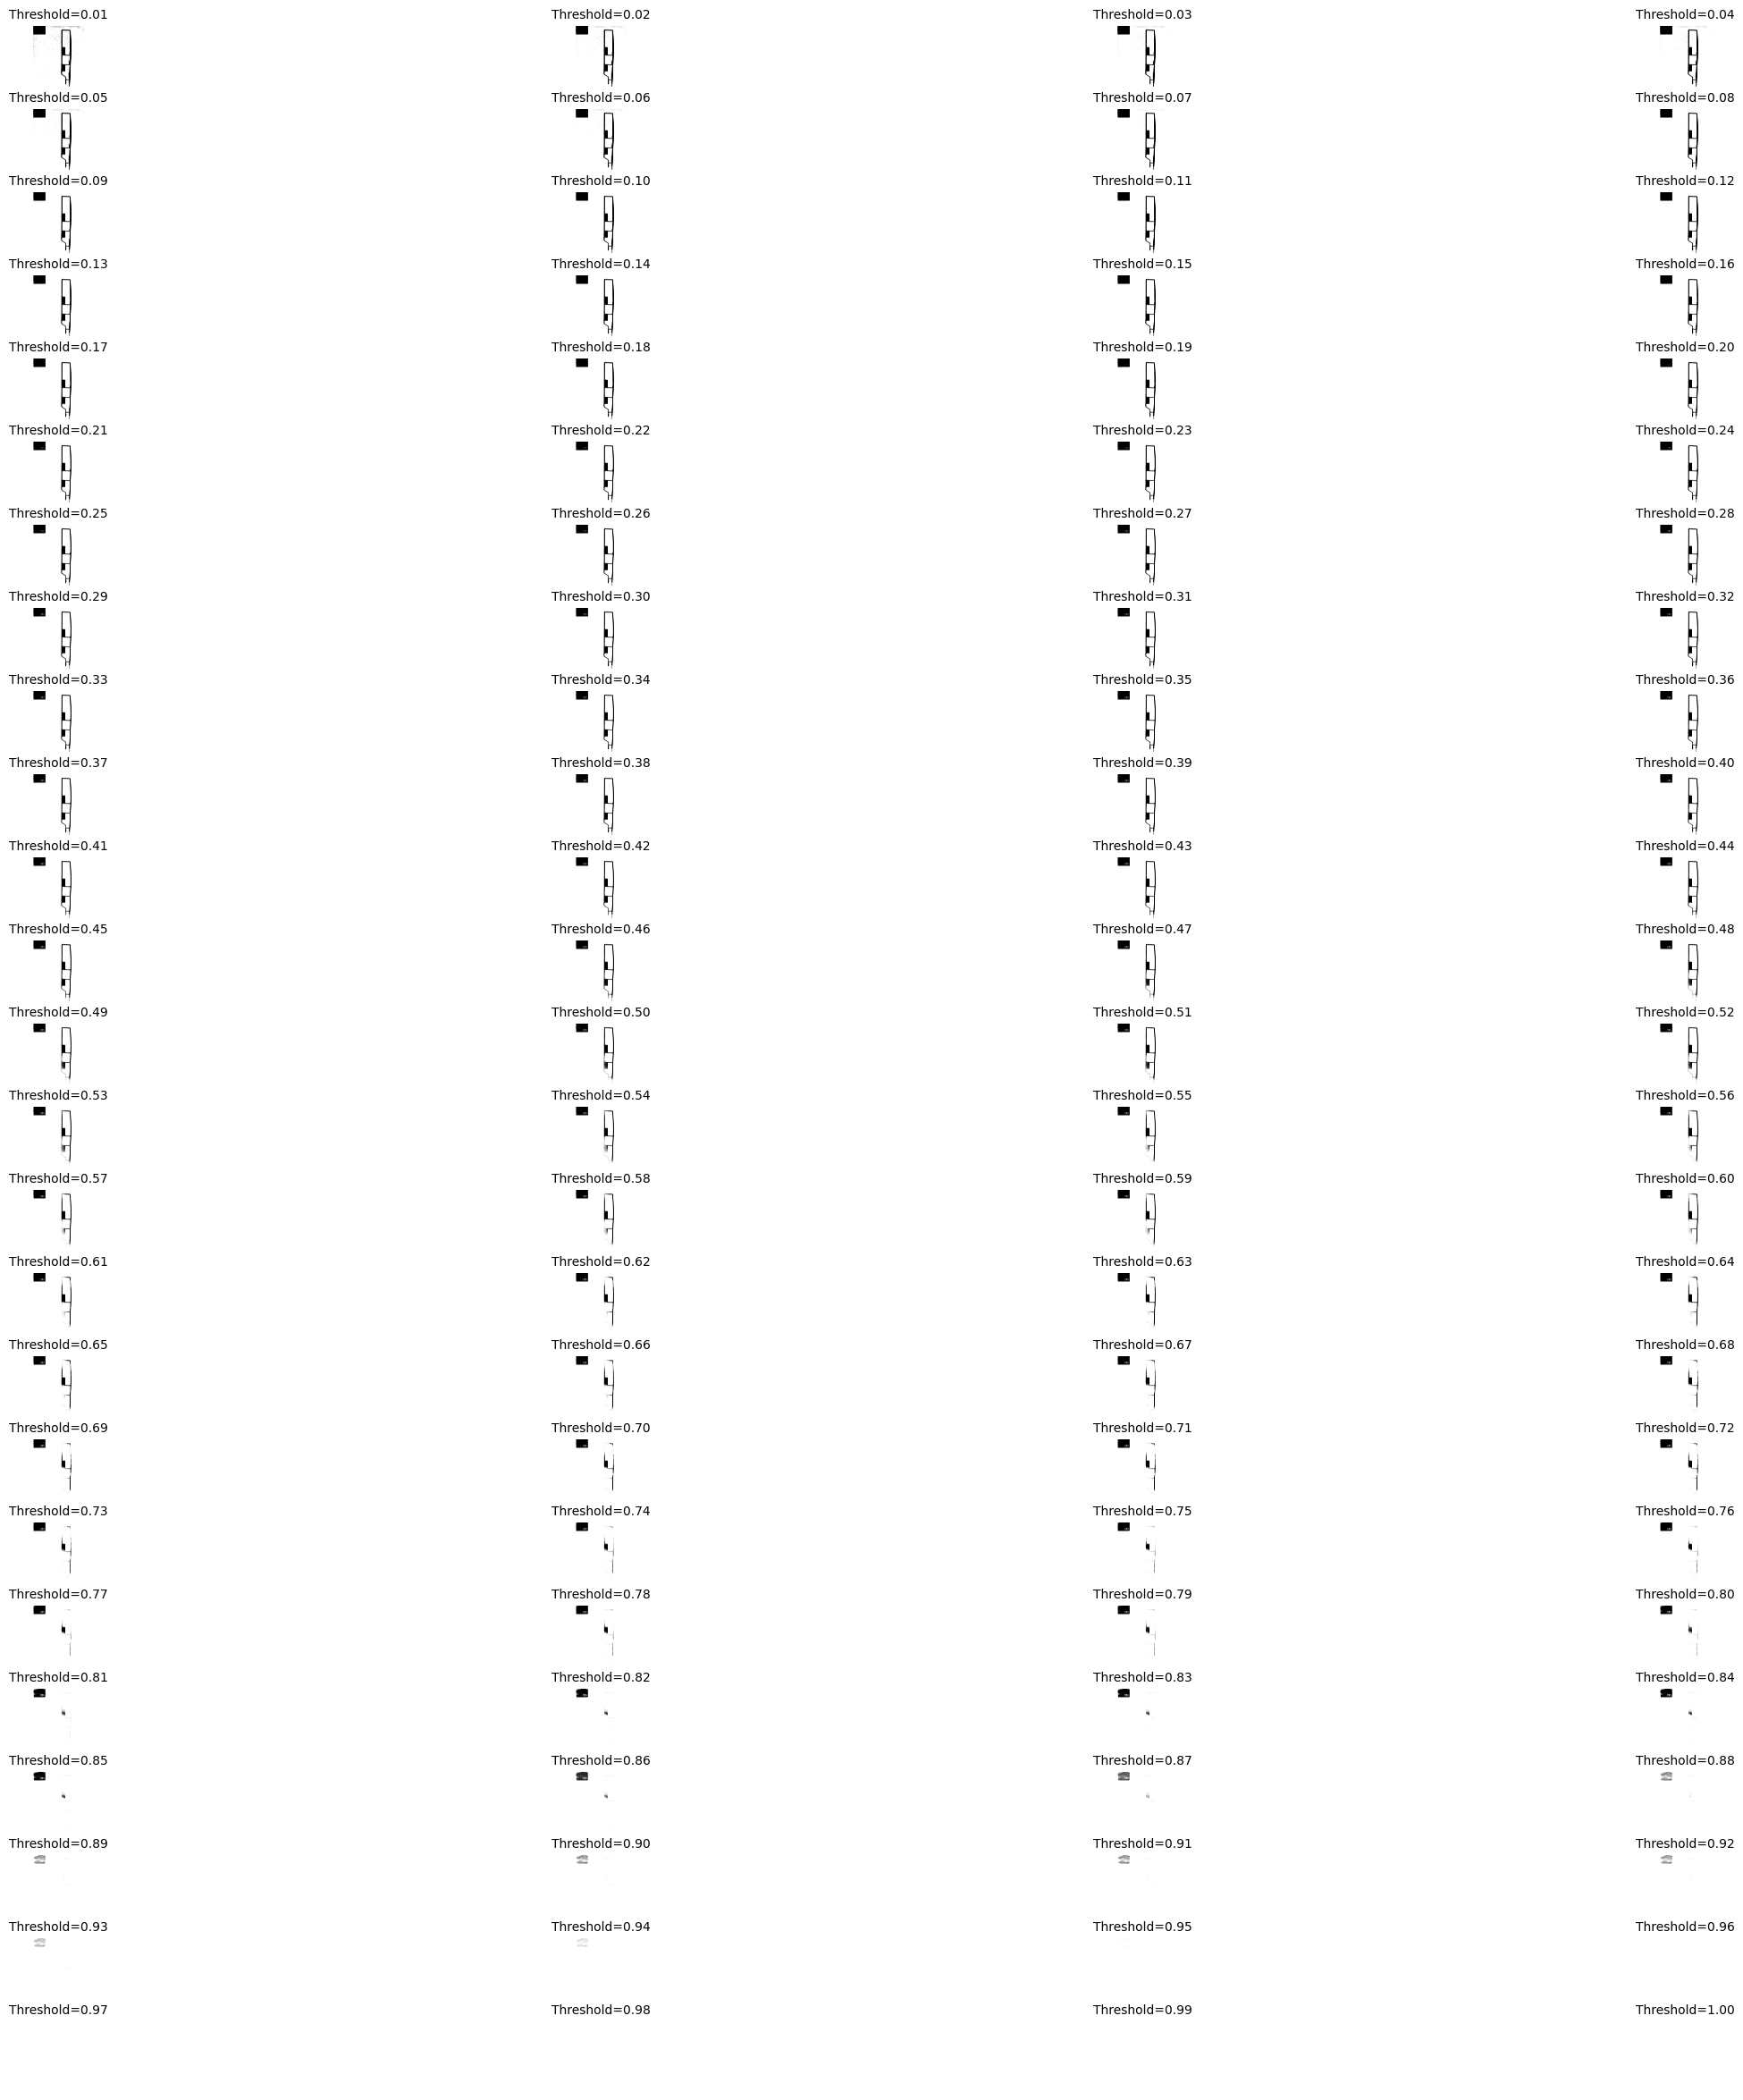

In [166]:
fig, axes = plt.subplots(25, 4, figsize=(30, 30))

for i in range(25):
    for j in range(4):
        axes[i, j].imshow(read_and_convert_to_binary("Skany profili/Profil 090.1.jpg", threshold=i*0.04+(j+1)*0.01), cmap = "binary")
        
        axes[i, j].set_title(f"Threshold={i*0.04+(j+1)*0.01:.2f}", fontsize=10)
        
        axes[i, j].axis("off")
    

plt.savefig("merged_image2.jpg", bbox_inches="tight", dpi=300)
plt.show()

## pipeline (function)

In [115]:
image = Image.open("Skany profili/Profil 001.1.jpg")

threshold = 0.3

data = np.asarray(image)
data = 0.2989 * data[:,:,0] + 0.5870 * data[:,:,1] + 0.1140 * data[:,:,2]
data = data / 255
data = 1 - data
data = data > threshold

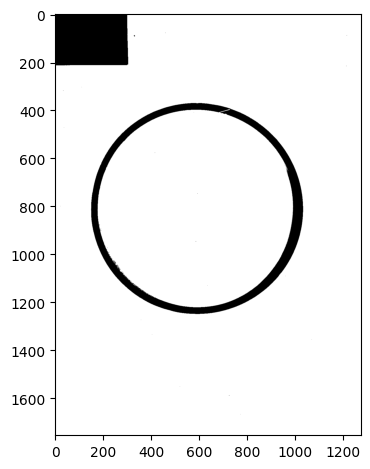

In [131]:
plotImageWithGrid(data)

In [117]:
rowSums, colSums = data.sum(axis=1), data.sum(axis=0)

In [118]:
rowSums.shape, colSums.shape

((1754,), (1275,))

In [119]:
rowDiffs = np.diff(rowSums)
colDiffs = np.diff(colSums)

In [120]:
rowDiffs = (rowDiffs < -40).astype(np.int32)
colDiffs = (colDiffs < -50).astype(np.int32)

In [122]:
rowDiffs = np.diff(rowDiffs)
colDiffs = np.diff(colDiffs)

In [123]:
np.argmin(rowDiffs), np.argmin(colDiffs)

(213, 301)

In [136]:
data[:int(np.argmin(rowSums)*1.05), :int(np.argmin(colDiffs)*1.05)] = 0

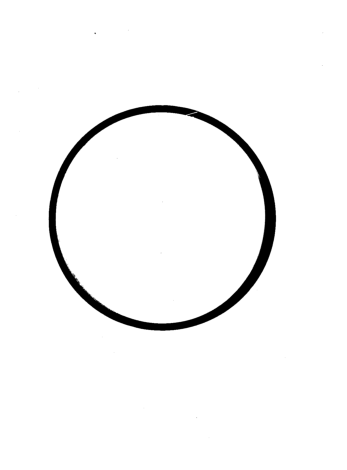

In [137]:
plotImage(data)

In [101]:
data[:500, :500].astype(np.int8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

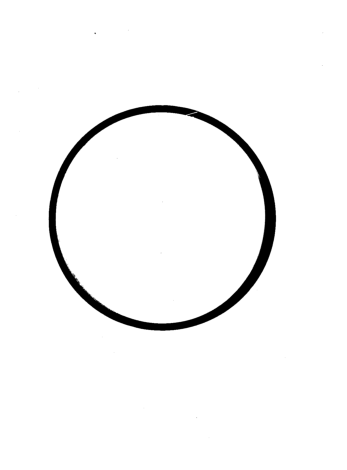

In [138]:
plotImage(data)

In [86]:
colSums.shape

(1275,)

In [3]:
def pipeline(data):
    rowSums, colSums = data.sum(axis=1), data.sum(axis=0)

    rowDiffs = np.diff(rowSums)
    colDiffs = np.diff(colSums)

    rowDiffs = (rowDiffs < -40).astype(np.int32)
    colDiffs = (colDiffs < -50).astype(np.int32)

    rowDiffs = np.diff(rowDiffs)
    colDiffs = np.diff(colDiffs)

    data[:int(np.argmin(rowSums)*1.05), :int(np.argmin(colDiffs)*1.05)] = 0

    return data

In [140]:
import os

KeyboardInterrupt: 

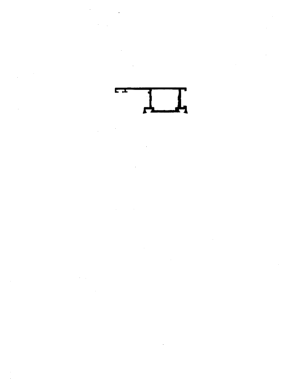

In [142]:
for filename in os.listdir("Skany profili"):
    data = pipeline(read_and_convert_to_binary("Skany profili//"+filename))
    plt.imshow(data, cmap = "binary")
    plt.axis("off")
    plt.savefig("without_labels//"+filename)